In [1]:
import os
os.environ["LC_ALL"] = "C.UTF-8"
os.environ["LANG"] = "en_US.UTF-8"

import numpy as np
from pysr import PySRRegressor
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline  


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
N = 64
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

In [3]:
# Formula of ground truth
Z = np.exp(-(X**2 + Y**2)) 

In [4]:
X_input = np.column_stack((X.ravel(), Y.ravel()))
y_output = Z.ravel()

model = PySRRegressor(
    niterations=100,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["sin", "cos", "exp", "log", "square"],
    extra_sympy_mappings={},
    verbosity=0,
)

model.fit(X_input, y_output)

/home/david/anaconda3/envs/sr/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


,model_selection,'best'
,binary_operators,"['+', '-', ...]"
,unary_operators,"['sin', 'cos', ...]"
,expression_spec,None
,niterations,100
,populations,31
,population_size,27
,max_evals,None
,maxsize,30
,maxdepth,None
,warmup_maxsize_by,None


In [5]:
Z_generated = model.predict(X_input).reshape(N, N)
print(Z_generated)

[[0.13649283 0.14510365 0.15399027 ... 0.15399027 0.14510365 0.13649283]
 [0.14497853 0.15412468 0.16356377 ... 0.16356377 0.15412468 0.14497853]
 [0.15378902 0.16349099 0.17350371 ... 0.17350371 0.16349099 0.15378902]
 ...
 [0.15378902 0.16349099 0.17350371 ... 0.17350371 0.16349099 0.15378902]
 [0.14497853 0.15412468 0.16356377 ... 0.16356377 0.15412468 0.14497853]
 [0.13649283 0.14510365 0.15399027 ... 0.15399027 0.14510365 0.13649283]]


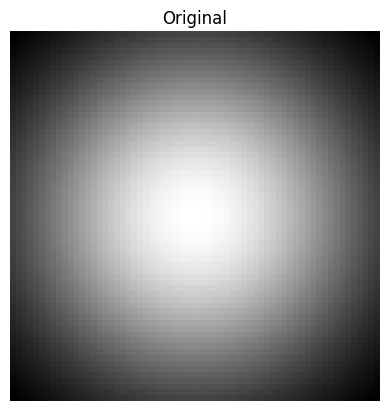

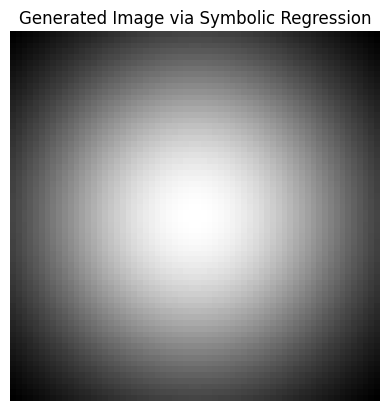

In [6]:
plt.imshow(Z, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

plt.imshow(Z_generated, cmap='gray')
plt.title("Generated Image via Symbolic Regression")
plt.axis("off")
plt.show()

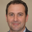

In [7]:
img = Image.open("image.jpeg").convert("RGB").resize((32, 32))
display(img)

img_np = np.asarray(img) / 255.0 

R = img_np[:, :, 0]
G = img_np[:, :, 1]
B = img_np[:, :, 2]

N = R.shape[0]

In [8]:
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
XY = np.column_stack((X.ravel(), Y.ravel()))

In [9]:
def fit_channel(channel):
    model = PySRRegressor(
        niterations=700,
        populations=200,
        model_selection='best',
        binary_operators=["+", "-", "*", "/"],
        unary_operators=["sin", "cos", "exp", "log", "square"],
        extra_sympy_mappings={},
        verbosity=0,
    )
    model.fit(XY, channel.ravel())
    return model

model_r = fit_channel(R)
model_g = fit_channel(G)
model_b = fit_channel(B)

/home/david/anaconda3/envs/sr/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/david/anaconda3/envs/sr/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/david/anaconda3/envs/sr/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


In [10]:
R_pred = model_r.predict(XY).reshape(N, N)
G_pred = model_g.predict(XY).reshape(N, N)
B_pred = model_b.predict(XY).reshape(N, N)

def normalize(channel):
    return np.clip((channel - channel.min()) / (channel.max() - channel.min() + 1e-8), 0, 1)

RGB_approx = np.stack([
    normalize(R_pred),
    normalize(G_pred),
    normalize(B_pred)
], axis=-1)

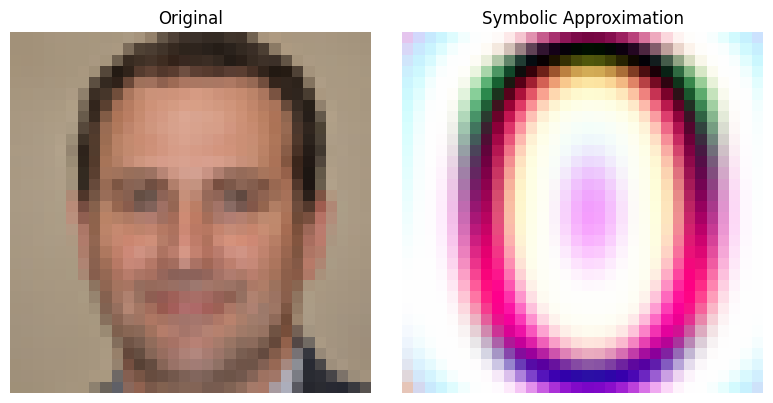

In [11]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(RGB_approx)
plt.title("Symbolic Approximation")
plt.axis("off")

plt.tight_layout()
plt.show()

In [12]:
eq_r = model_r.get_best()
eq_g = model_g.get_best()
eq_b = model_b.get_best()

print("R(x, y):", eq_r)
print("G(x, y):", eq_g)
print("B(x, y):", eq_b)

R(x, y): complexity                                                      23
loss                                                      0.010731
equation         cos(cos(exp(x1)) * square(sin(square(exp(cos(s...
score                                                      0.07448
sympy_format     cos((sin(exp(2*cos(0.792247084935366*x1**2))*s...
lambda_format    PySRFunction(X=>cos((sin(exp(2*cos(0.792247084...
Name: 20, dtype: object
G(x, y): complexity                                                      16
loss                                                      0.010509
equation         cos(square(cos(cos(x1) * exp(square(cos(x0 + -...
score                                                     0.084522
sympy_format     cos(cos(exp(cos(x0 - 0.050111987)**2*1.723493)...
lambda_format    PySRFunction(X=>cos(cos(exp(cos(x0 - 0.0501119...
Name: 12, dtype: object
B(x, y): complexity                                                      22
loss                                                  